<a href="https://colab.research.google.com/github/kang9366/Deep-Learning-Study/blob/main/California_Housing_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Module Import

In [11]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

## Data preprocessing

In [2]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

## Scaling

In [3]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

## Sequence API Model

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [ ]:
model.compile(loss='mean_squared_error', optimizer="sgd")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 30)                270       
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9915 - val_loss: 1.5576
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4917 - val_loss: 0.4417
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4505 - val_loss: 0.4358
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4178 - val_loss: 0.4167
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4008 - val_loss: 0.4075
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3976 - val_loss: 0.4059
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3863 - val_loss: 0.4026
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3807 - val_loss: 0.3970
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3808 - val_loss: 0.3977
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3756 - val_loss: 0.3896

In [ ]:
mse_text = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 3ms/step - loss: 0.3555


In [ ]:
X_new = X_test
y_pred = model.predict(X_new)

162/162 [==============================] - 0s 2ms/step


## Functional API Model

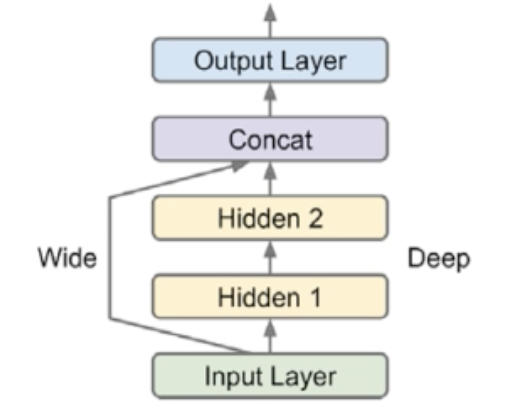

In [4]:
input = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input], outputs=[output])

In [5]:
model.compile(loss='mean_squared_error', optimizer="sgd")
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

In [6]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 3s 3ms/step - loss: 0.8642 - val_loss: 7.5148
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 4.1144 - val_loss: 0.6444
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7173 - val_loss: 0.6343
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 1.0900 - val_loss: 0.4386
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4359 - val_loss: 0.4362
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4306 - val_loss: 0.4322
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5450 - val_loss: 0.4074
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4172 - val_loss: 0.4032
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4278 - val_loss: 0.3946
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4026 - val_loss: 0.3892

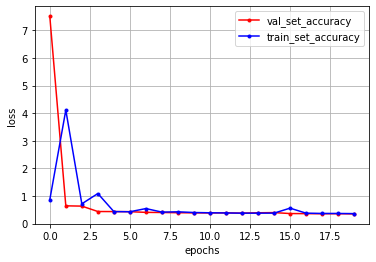

In [12]:
y_loss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()